In [1]:
##################################
## Titanic Data Analysis
##################################

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
# Visualization of data
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


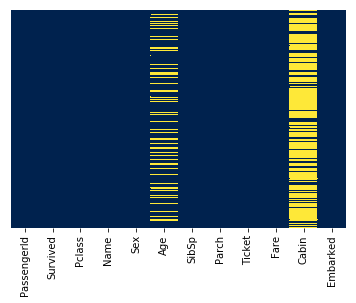

In [4]:
# Check null values in the data using a heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [5]:
sns.set_style('whitegrid')

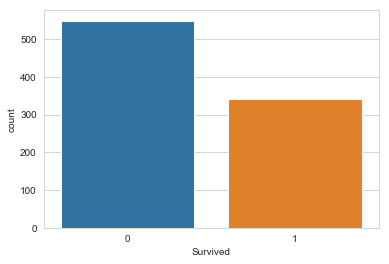

In [6]:
# We check a little bit our variables
sns.countplot(x='Survived',data=train)

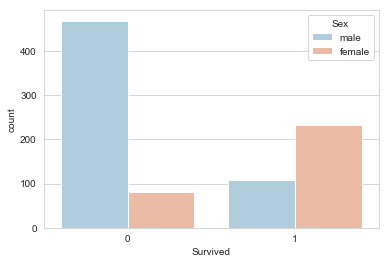

In [7]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

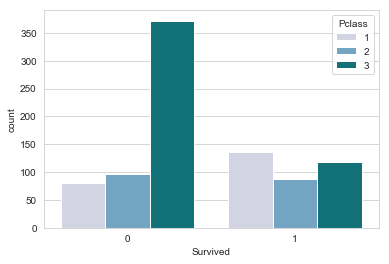

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='PuBuGn')

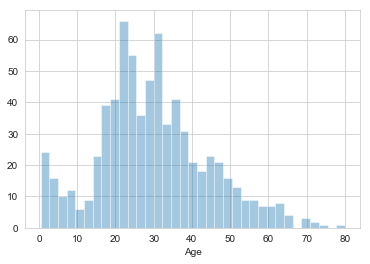

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,bins=35)

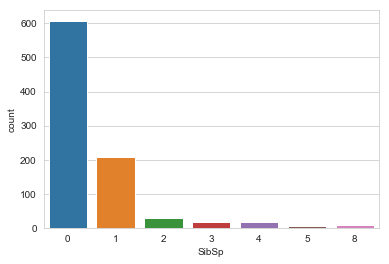

In [10]:
sns.countplot(x='SibSp',data=train)

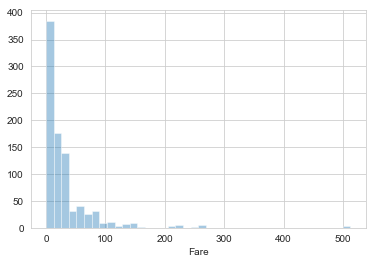

In [11]:
sns.distplot(train['Fare'],kde=False,bins=40)

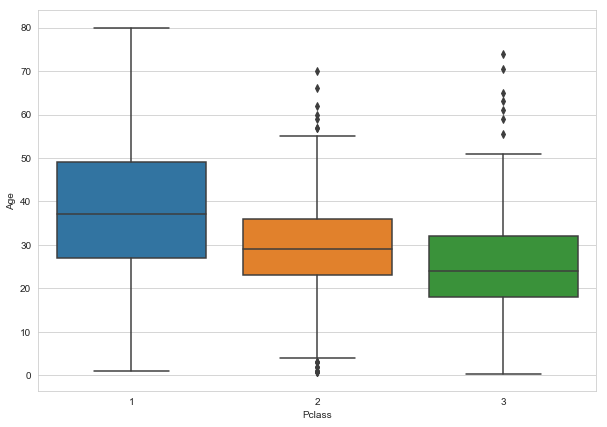

In [12]:
## Data Cleanse
# Now we check the average and median age for each class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [13]:
def calculate_age(data,mean_or_med):
    if mean_or_med.lower() == 'mean':
        pclass_values = [data[data['Pclass']==1]['Age'].mean(), data[data['Pclass']==2]['Age'].mean(), data[data['Pclass']==3]['Age'].mean()]
    else:
        pclass_values = [data[data['Pclass']==1]['Age'].median(), data[data['Pclass']==2]['Age'].median(), data[data['Pclass']==3]['Age'].median()]
    return pclass_values

def impute_age(cols,pclass_values):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return pclass_values[0]
        elif Pclass == 2:
            return pclass_values[1]
        else:
            return pclass_values[2]
    else:
        return Age

In [14]:
pclass_v = calculate_age(train,'median')
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1,pclass_values=pclass_v)

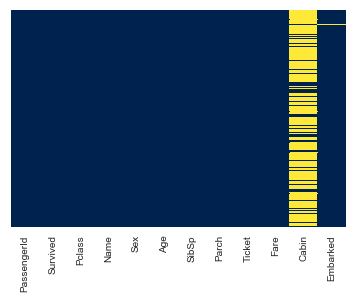

In [15]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [16]:
# We now drop the rest of the missing values. The cabin column will be completely ignored as well as the missing values of Embarked
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)

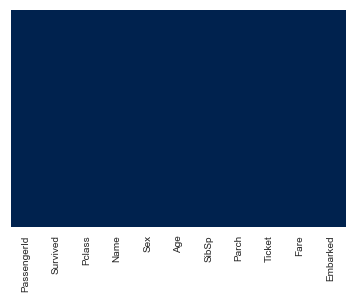

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='cividis')

In [18]:
# Now to add the dummy variables!
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

# To check what happens: 
# pclass = pd.get_dummies(train['Pclass'],drop_first=True)

train = pd.concat([train,sex,embark],axis=1)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [20]:
# Now we drop the columns that aren't required for the regression
train.drop(['PassengerId','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [21]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
# We now create the model using the scikit library
# For studying purpose of how to apply the scikit learn model selection, we separate the training data we were using
X = train.drop('Survived',axis=1)
y = train['Survived']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# Note here: The coefficient C=1e8 is added to diminish the regularization that scikit automatically does
# when creating the model. This is done so the coefficients from the scikit regression and from the 
# statsmodels regression return equal values
logmodel = LogisticRegression(C=1e8)
logmodel.fit(X_train,y_train)

C:\Users\hcmor\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
# Report of the performance
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

   micro avg       0.83      0.83      0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [29]:
# To get the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]], dtype=int64)

In [30]:
# Another way of obtaining this, more readable
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,150,13,163
1,32,72,104
All,182,85,267


In [31]:
logmodel.coef_

array([[-1.14368165e+00, -4.26191662e-02, -2.56191303e-01,
        -1.04556915e-01,  1.32116506e-03, -2.62288454e+00,
        -1.86580815e-01, -3.61361626e-01]])

In [32]:
### Now we'll perform the analysis with statsmodels, to check if the all the parameters are significant
import statsmodels.api as sm

In [33]:
X = sm.add_constant(X_train)

In [34]:
model = sm.Logit(y_train,X)

In [35]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.446235
         Iterations 6


In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                          Logit   Df Residuals:                      613
Method:                           MLE   Df Model:                            8
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:                  0.3277
Time:                        16:58:24   Log-Likelihood:                -277.56
converged:                       True   LL-Null:                       -412.87
                                        LLR p-value:                 7.241e-54
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2911      0.704      7.519      0.000       3.912       6.670
Pclass        -1.1450      0.176     -6.491      0.000      -1.491      -0.799
Age           -0.0427      0.010     -4.203      0.000      -0.063      -0.023
SibSp         -0.2564      0.129     -1.989      0.047      -0.509      -0.004
Parch         -0.1043      0.145     -0.719      0.472      -0.389       0.180
Fare           0.0013      0.003      0.468      0.640      -0.004       0.007
male          -2.6232      0.235    -11.174      0.000      -3.083      -2.163
Q             -0.1869      0.455     -0.411      0.681      -1.078       0.705
S             -0.3619      0.285     -1.269      0.205      -0.921       0.197
==============================================================================
"""

In [ ]:
# It can be seen here that the Fare, Parch, Q and S columns are not significant, therefore, 
# they aren't good predictors for this model and must be excluded one by one (checking the
# effect done when removing them one by one)